<a href="https://colab.research.google.com/github/SaravanavelE/ML_mini_project/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [3]:
#import the dataset
d=pd.read_csv("/content/drive/MyDrive/4thSem/MLOps/Dataset/house.csv")
d.head()

,yr_built,price
0,1955,221900.0
1,1951,538000.0
2,1933,180000.0
3,1965,604000.0
4,1987,510000.0


In [4]:
d.isna().sum()

,0
yr_built,0
price,0


In [5]:
x= d['yr_built'].values.reshape(-1, 1)# Feature
y =d['price'].values # Target

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
x_pred = model.predict(x_train)  # Predict for all x_train values
x_pred

array([545030.84289929, 512467.06912041, 520306.49614125, ...,
       557694.53270219, 532970.18594415, 558900.59839771])

In [8]:
y_pred= model.predict(x_test)
y_pred

array([546839.94144256, 541412.64581275, 553473.30276789, ...,
       559503.63124546, 535382.31733518, 560106.66409322])

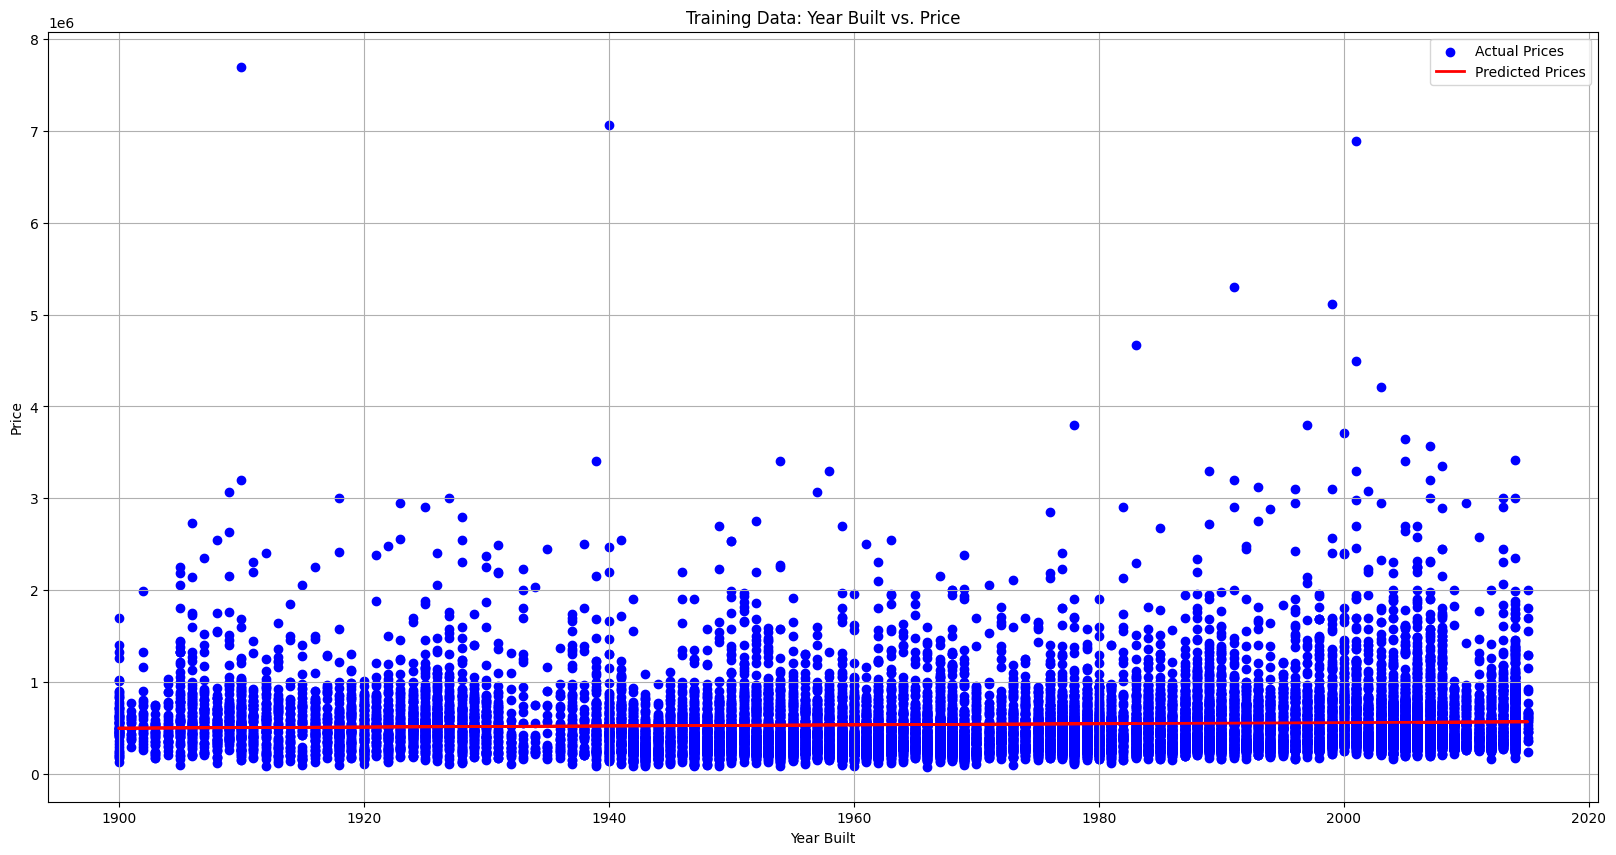

In [21]:
# Training plot
plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='blue', label='Actual Prices')
plt.plot(x_train, x_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Training Data: Year Built vs. Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import numpy as np

year_built = int(input("Enter the year the house was built: "))
predicted_price = model.predict([[year_built]])[0]
rounded_price = round(float(predicted_price))
print(f"Predicted price for a house built in {year_built}: Rs.{rounded_price}")


Enter the year the house was built: 2030
Predicted price for a house built in 2030: Rs.573373


In [12]:
# regression coefficients
print('Coefficients: ', model.coef_)

Coefficients:  [603.03284776]


In [13]:
#regress intercept
print('Intercept:',model.intercept_)

Intercept: -650783.2942029112


In [14]:
# variance score
print('Variance score: ',model.score(x_test, y_test))

Variance score:  0.0036155319884999537


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 150807475459.52545
Mean Absolute Error (MAE): 239711.49987958642
R-squared (R2): 0.0036155319884999537
